In [ ]:
# Created By Venujan Malaiyandi
# BSCP|CS|61|101
# For Task 8.3HD
# Cyber Security Analytics

In [53]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import make_scorer

In [31]:
#get data
data = np.genfromtxt('./Complex8_N15.csv', delimiter=',', skip_header=1)
x = data[:,1]
y = data[:,2]
class_column = data[:,3]

X = np.column_stack((x,y))


In [32]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, class_column, train_size=0.5,random_state=1)

In [33]:
print(x_train.shape)
print(x_test.shape)

(1466, 2)
(1467, 2)


In [34]:
#use min max scaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
# using standard scaller

#scaler = StandardScaler()

#x_scaled = scaler.fit(x_train)
#x_train_scaled = scaler.transform(x_train)
#x_test_scaled = scaler.transform(x_test)



In [36]:
# build the clustering model
kmeans = KMeans(n_clusters=8)
kmeans.fit(x_train)
y_pred = kmeans.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25357873210633947


In [38]:
# use grid search with kmeans
n_numbers = ['auto']
n_numbers.extend(range(1, 101))

k_param_grid = {'n_clusters':[6,7,8],
              'init': ['random', 'kmeans++'],
              'n_init': n_numbers
              }
grid_search_kmeans_model = KMeans()
grid_search_kmeans = GridSearchCV(estimator=grid_search_kmeans_model, param_grid=k_param_grid, cv=5, return_train_score=True  )
grid_search_kmeans.fit(x_train)


# Get information from grid_search the grid search
print("Parameter grid:\n", k_param_grid)
print("Best Test Score:", grid_search_kmeans.score(x_test))
print("Best Parameters:", grid_search_kmeans.best_params_)
print("Best Cross-Validation Score:", grid_search_kmeans.best_score_)
print("Best Estimator:", grid_search_kmeans.best_estimator_.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1515 fits failed out of a total of 3030.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1515 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py", line 1415, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Parameter grid:
 {'n_clusters': [6, 7, 8], 'init': ['random', 'kmeans++'], 'n_init': ['auto', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}
Best Test Score: -9.032831259547558
Best Parameters: {'init': 'random', 'n_clusters': 8, 'n_init': 2}
Best Cross-Validation Score: -1.8349615885734814
Best Estimator: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 300, 'n_clusters': 8, 'n_init': 2, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


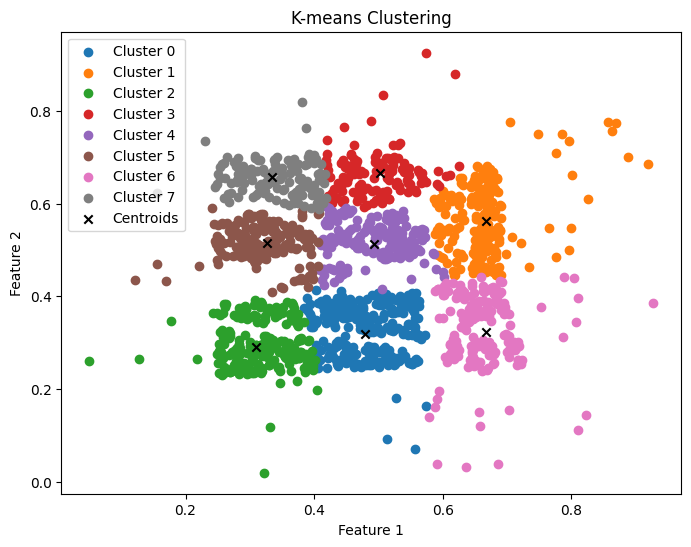

In [39]:
#plot kmeans with best param
best_K_param = grid_search_kmeans.best_estimator_.get_params()

kmeans = KMeans(**best_K_param)
kmeans.fit(x_train)

y_pred = kmeans.predict(x_test)

centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
train_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
# Plot each cluster
for cluster_label in range(8):
    # Get indices of data points belonging to the cluster
    cluster_indices = (y_pred == cluster_label)
    plt.scatter(x_test[cluster_indices, 0], x_test[cluster_indices, 1], label=f'Cluster {cluster_label}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()



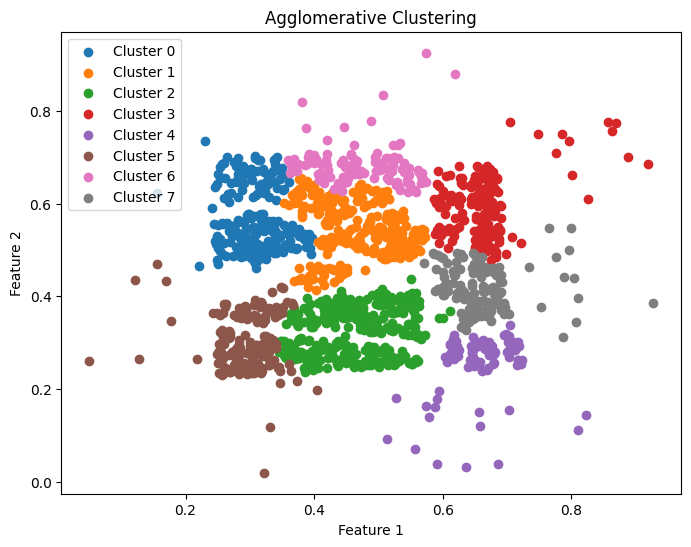

In [40]:

num_clusters = 8  # Adjust the number of clusters as needed
agg = AgglomerativeClustering(n_clusters=num_clusters)
agg.fit(x_train)

# Predict clusters for test data
assignment = agg.fit_predict(x_test)

# Plot the data points and the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster_label in range(num_clusters):
    # Get indices of data points belonging to the cluster
    cluster_indices = (assignment == cluster_label)
    plt.scatter(x_test[cluster_indices, 0], x_test[cluster_indices, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


In [41]:
def silhouette_scorer(estimator, X):
    clusters = estimator.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score

#use Agglomerative with grid search
agg_param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8],  # Number of clusters
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],  # Distance metric
    'linkage': ['ward', 'complete', 'average', 'single']  # Linkage criterion
}

# Create AgglomerativeClustering instance
agg = AgglomerativeClustering()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=agg, param_grid=agg_param_grid, scoring=silhouette_scorer, cv=5)

# Perform grid search on training data
grid_search.fit(x_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Optionally, you can also get the best estimator
best_estimator = grid_search.best_estimator_

# Predict clusters for test data using the best estimator
assignment = best_estimator.fit_predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Best Parameters: {'affinity': 'l1', 'linkage': 'single', 'n_clusters': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


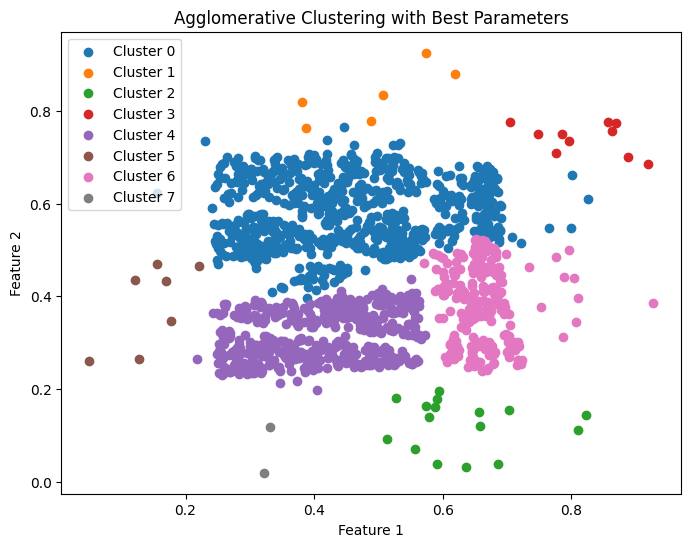

In [42]:
#plot agglomerative with best param

best_agg = AgglomerativeClustering(affinity ='euclidean', linkage = 'average', n_clusters = 8)
best_agg.fit(x_train)

# Predict clusters for test data
assignment = best_agg.fit_predict(x_test)

# Plot the data points and the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster_label in range(8):
    # Get indices of data points belonging to the cluster
    cluster_indices = (assignment == cluster_label)
    plt.scatter(x_test[cluster_indices, 0], x_test[cluster_indices, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering with Best Parameters')
plt.legend()
plt.show()

1466
1466


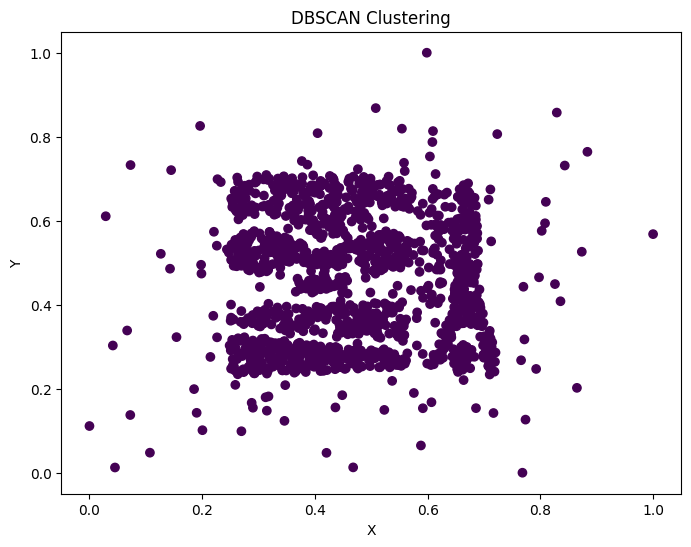

In [47]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(x_train)

# Get cluster labels
labels = dbscan.labels_

# Check the length of labels array
print(len(labels))
print(len(x_train))

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:,0], x_train[:,1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

Best Parameters: {'eps': 0.1}


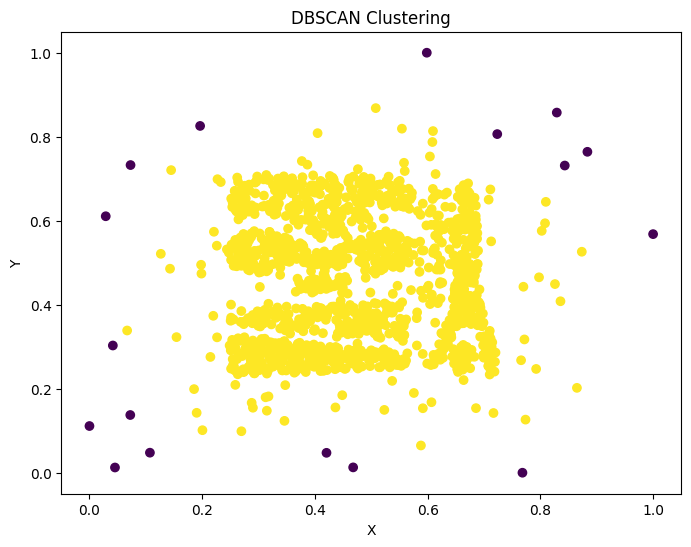

In [56]:
def dummy_scoring(estimator, X):
    return 0

epsilon_values = np.linspace(0.1, 0.2, num=100)

param_grid = {'eps': epsilon_values}

dbscan = DBSCAN(min_samples=5)

grid_search = GridSearchCV(dbscan, param_grid, cv=5, scoring=make_scorer(dummy_scoring))
grid_search.fit(x_train)

# Get the best estimator
best_dbscan = grid_search.best_estimator_


print("Best Parameters:", grid_search.best_params_)


best_dbscan.fit(x_train)
labels = best_dbscan.labels_

plt.figure(figsize=(8, 6))
plt.scatter(x_train[:,0], x_train[:,1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [55]:
#use dbscan with grid search
grid_search.best_params_

{'eps': 0.1}

In [ ]:
# plot dbscan with best param
# reduce the epsilon if necessary